In [9]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.dummy import DummyClassifier

#import statsmodels.api as sm
import itertools

ImportError: cannot import name rankdata

In [7]:
df

,index,Age,NIHSS,Unnamed: 2,Unnamed: 3,MRS,Unnamed: 5,Unnamed: 6
0,0,66.0,22,18.9964,17.641509,1,0.786401,1.886792
1,1,83.0,15,6.97757,17.641509,4,4.465646,1.886792
2,2,83.0,21,11.2795,17.641509,2,0.012816,1.886792
3,3,81.0,24,40.4304,17.641509,1,0.786401,1.886792
4,4,81.0,21,11.2795,17.641509,1,0.786401,1.886792
5,5,67.0,20,5.56248,17.641509,2,0.012816,1.886792
6,6,64.0,27,87.5813,17.641509,1,0.786401,1.886792
7,7,87.0,11,44.1096,17.641509,3,1.239231,1.886792
8,8,77.0,21,11.2795,17.641509,3,1.239231,1.886792
9,9,70.0,9,74.6757,17.641509,2,0.012816,1.886792


In [6]:
df = pd.read_excel('Discharge destinations 2.xlsx', 
                   sheet_name='Regression analysis',
                  header=1)

df.reset_index(inplace=True)
df.drop(['index', 'Key'], axis=1)

X = df[['Age', 'NIHSS', 'MRS']].as_matrix() 
X = stats.zscore(X)

y = df['Outcome'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y)


ValueError: labels ['Key'] not contained in axis

# Logistic regression

In [49]:
acc_dict = {}
for c in np.linspace(0.01,10,1000):
    lr = LogisticRegression(C=c)
    acc_dict[c] = np.mean(cross_validate(lr, X_train, y_train)['test_score'])

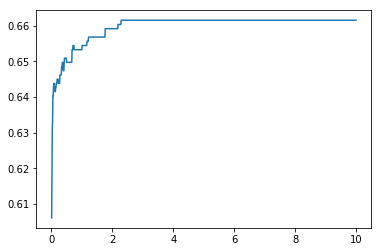

In [50]:
plt.plot(acc_dict.keys(), acc_dict.values())

## SVM

### Linear

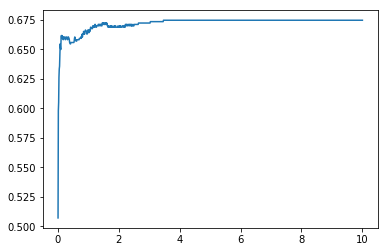

In [57]:
acc_dict = {}
for c in np.linspace(0.01,10,1000):
    s_v_m = svm.SVC(C=c, kernel='linear')
    acc_dict[c] = np.mean(cross_validate(s_v_m, X_train, y_train)['test_score'])

plt.plot(acc_dict.keys(), acc_dict.values())

## RBF

In [82]:
acc_dict = {}
for g in np.linspace(0.25,0.45,100):
    acc_dict[g] = {}
    for c in np.linspace(5,7,50):
        s_v_m = svm.SVC(C=c, kernel='rbf', gamma=g)
        acc_dict[g][c] = np.mean(cross_validate(s_v_m, X_train, y_train)['test_score'])


In [90]:
import operator
max_acc = []
for g in np.linspace(0.25,0.45,100):
    max_acc.append((max(acc_dict[g].items(), key=operator.itemgetter(1))[1]))


In [107]:
max(max_acc)
g = 0.4196969696969697
c = 5.204081632653061

0.6969191957162787

In [121]:
s_v_m = svm.SVC(C=5.2, kernel='rbf', gamma=.42)
print(np.mean(cross_validate(s_v_m, X_train, y_train)['test_score']))
s_v_m.fit(X_train, y_train)

0.6969191957162787


SVC(C=5.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.42, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [171]:
best_score = s_v_m.score(X_test, y_test)

In [153]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

Confusion matrix, without normalization
[[ 10  16   0   0]
 [  6 118  26   3]
 [  0  23  37   8]
 [  0   1   5  30]]


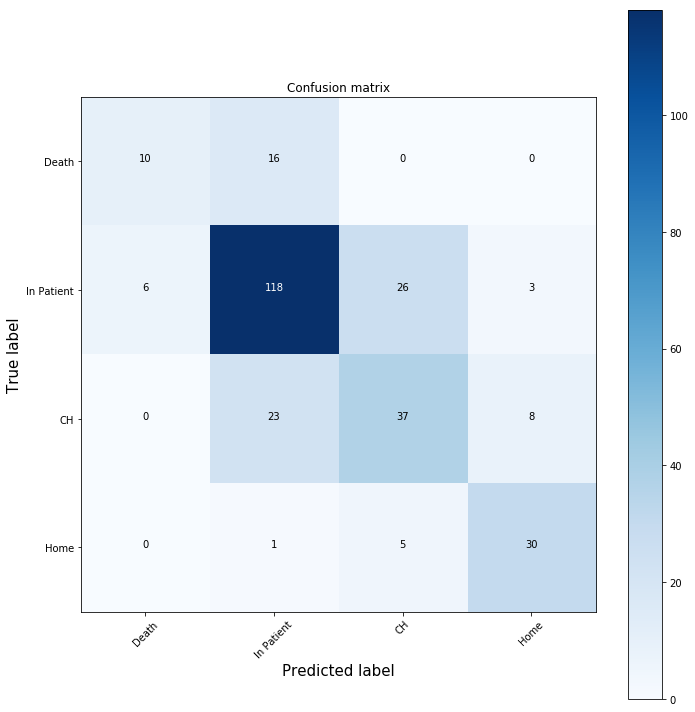

In [155]:
yhat = s_v_m.predict(X_test)
plt.figure(figsize=(10,10))
cmtx = confusion_matrix(y_test, yhat)
labels =  ['Death', 'In Patient', 'CH', 'Home']
plot_confusion_matrix(cmtx, labels)

In [159]:
precision_recall_fscore_support(y_test, yhat)

(array([0.625     , 0.74683544, 0.54411765, 0.73170732]),
 array([0.38461538, 0.77124183, 0.54411765, 0.83333333]),
 array([0.47619048, 0.75884244, 0.54411765, 0.77922078]),
 array([ 26, 153,  68,  36]))

## Polynomial

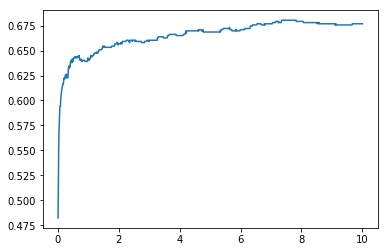

In [59]:
acc_dict = {}
for c in np.linspace(0.01,10,1000):
    s_v_m = svm.SVC(C=c, kernel='poly')
    acc_dict[c] = np.mean(cross_validate(s_v_m, X_train, y_train)['test_score'])

plt.plot(acc_dict.keys(), acc_dict.values())

## LinearSVC



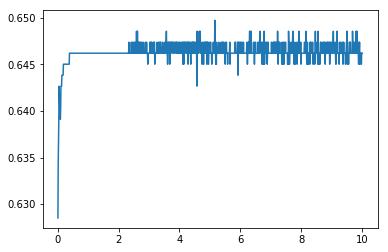

In [61]:
acc_dict = {}
for c in np.linspace(0.01,10,1000):
    s_v_m = svm.LinearSVC(C=c)
    acc_dict[c] = np.mean(cross_validate(s_v_m, X_train, y_train)['test_score'])

plt.plot(acc_dict.keys(), acc_dict.values())

# Random forest

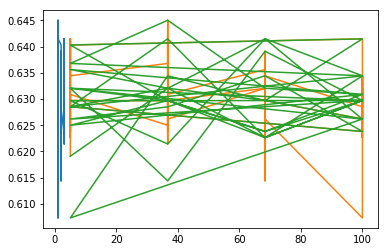

In [66]:
acc_dict = {}
for n_features in range(1,4):
    for n_estimators in np.linspace(5,100,4):
        for n_min_leaf in np.linspace(5,100,4):
            rf = AdaBoostClassifier(RandomForestClassifier(), n_estimators=100)
            acc_dict[(n_features, n_estimators, n_min_leaf)] = np.mean(cross_validate(rf, X_train, y_train)['test_score'])



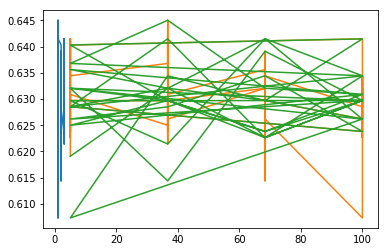

In [67]:
plt.plot(acc_dict.keys(), acc_dict.values())
plt.show()

In [68]:
acc_dict

{(1, 5.0, 5.0): 0.6190971439073086,
 (1, 5.0, 36.66666666666667): 0.632045209633361,
 (1, 5.0, 68.33333333333334): 0.6415014744087745,
 (1, 5.0, 100.0): 0.6344343365995874,
 (1, 36.66666666666667, 5.0): 0.6367942259980454,
 (1, 36.66666666666667, 36.66666666666667): 0.6450308665179727,
 (1, 36.66666666666667, 68.33333333333334): 0.6320535632241518,
 (1, 36.66666666666667, 100.0): 0.6308965908995982,
 (1, 68.33333333333334, 5.0): 0.6356247232873051,
 (1, 68.33333333333334, 36.66666666666667): 0.6320660936103385,
 (1, 68.33333333333334, 68.33333333333334): 0.6297312649842535,
 (1, 68.33333333333334, 100.0): 0.6261851656934733,
 (1, 100.0, 5.0): 0.607322757687392,
 (1, 100.0, 36.66666666666667): 0.6344343365995874,
 (1, 100.0, 68.33333333333334): 0.6297020274164851,
 (1, 100.0, 100.0): 0.6414805904317972,
 (2, 5.0, 5.0): 0.6403069109256614,
 (2, 5.0, 36.66666666666667): 0.6297229113934625,
 (2, 5.0, 68.33333333333334): 0.62382109949962,
 (2, 5.0, 100.0): 0.6308715301272252,
 (2, 36.666666

In [156]:
len(y_train)

848

In [157]:
len(y_test)

283

# Dummy model

In [197]:
dummy = DummyClassifier()

In [198]:
dummy.fit(X_train, y_train)
strat = dummy.score(X_test, y_test)
strat

0.4204946996466431

In [199]:
dummy = DummyClassifier('most_frequent')

In [200]:
dummy.fit(X_train, y_train)
max_class = dummy.score(X_test, y_test)
max_class

0.5406360424028268

In [201]:
dummy = DummyClassifier('uniform')

In [202]:
dummy.fit(X_train, y_train)
uniform = dummy.score(X_test, y_test)
uniform

0.2579505300353357

Text(0.5,0,'Model')

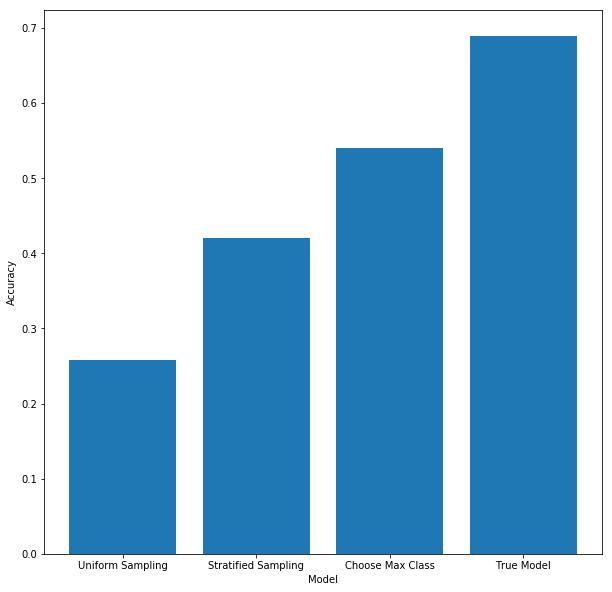

In [206]:
plt.figure(figsize=(10,10))

plt.bar(range(4), [uniform, strat, max_class, best_score])
plt.xticks(range(4), ['Uniform Sampling', 'Stratified Sampling',
           'Choose Max Class', 'True Model'])
plt.ylabel('Accuracy')
plt.xlabel('Model')

In [191]:
contingency_table = np.zeros((2,2))
dummy = DummyClassifier('most_frequent')
dummy.fit(X_train, y_train)

pred_real_model = s_v_m.predict(X_test)
correct_real_model = pred_real_model == y_test

pred_dummy_model = dummy.predict(X_test)
correct_dummy_model = pred_dummy_model == y_test


contingency_table[0,0] = sum(correct_real_model & correct_dummy_model)
contingency_table[0,1] = sum(correct_real_model & ~correct_dummy_model)
contingency_table[1,0] = sum(~correct_real_model & correct_dummy_model)
contingency_table[1,1] = sum(~correct_real_model & ~correct_dummy_model)
contingency_table


array([[118.,  77.],
       [ 35.,  53.]])

In [192]:

result = sm.stats.mcnemar(contingency_table)

In [193]:
result.pvalue

8.980220370452061e-05

In [194]:
resu

<bunch object containing statsmodels results>